## KNN (K-Nearest Neighbors)

KNN algorithm can be used to solve both regression and classification tasks.

Unlike most ML algorithms, KNN is a lazy-learning model, because KNN models don't train iteratively by itself with predetermined cost functions. In addition, the higher then number of training samples, the larger its model size.

Instead, KNN algorithm computes Euclidean distance between current point and all other points and it determines K points that are nearest to the current point by distance.

<img src = "https://miro.medium.com/max/700/0*34SajbTO2C5Lvigs.png">

<b>Assumptions of K-Nearest Neighbors</b>: 
1. Similar data points exist in close proximity, which can be measured by distance metrics
2. Every training data points consists of a set of vectors and class label associated with each vector.

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

<b>Advantages of KNN</b>:
- Simple and easy algorithm to implement
- No requirement to train model, so that data points can be added easily 
- No strict assumptions, since it is a non-parametric algorithm
- Can be used for both regression and classification tasks

<b>Disadvantages of KNN</b>: 
- Algorithm is significantly slower as number of training examples/predictors increases.
- Not robust to outliers

<b>Methods to handle imbalanced dataset</b>:
1. Resampling techniques (Oversampling/SMOTETomek)

## KNN algorithms

In KNN, there are three types of algorithms available:

1. <b>brute-force</b>: Euclidean distance from point of interest to all the points in training set are computed. Then, from a set of K neighbors, either the class with majority points is selected or the average of set of K neighbors is used instead.

- <b>Time complexity of model training: O(1)</b>

- <b>Time complexity of model prediction: O(knd)</b>

- <b>Space complexity of model prediction: O(knd)</b>

- n - Number of training samples

- k - Number of neighbors

- d - Number of features

2. <b>k-d tree</b>: Hierarchical binary tree that rearranges the whole dataset in a binary tree by dividing the dataset by median values.

<img src = "https://miro.medium.com/max/700/0*aq6fJrS1QfR_du19.png" width="400">

- <b>Time complexity of model training: O(1)</b>

- <b>Time complexity of model prediction (Best to worst case): O(2^d*(k)*log n) to O(k*n)</b>

- <b>Space complexity of model prediction: O(k*n)</b>

- n - Number of training samples

- k - Number of neighbors

- d - Number of features

3. <b>ball tree</b>: Hierarchical ball tree that groups points into clusters organized in a tree structure.

<img src = "https://miro.medium.com/max/700/0*e7VoxNaB_BSd8fFP.png" width="500">

<img src = "https://miro.medium.com/max/502/0*NJ4ARL6vl73J8hJJ.png" width="400">

## Selection of K-value

Selecting the optimum K value for the KNN algorithm requires hyperparameter tuning to identify the best K value that provides the best model performance.

General guidelines on selection of K values:
1. Odd number of K value is preferable in the case of tiebreaker when taking a majority vote in classification problem.

2. Increasing K value might result in more stable model predictions up to a certain point.

Note that larger K values might indicate high bias (underfitting), while smaller K values might indicate high variance (overfitting)

## Distance Calculation in KNN

KNN algorithm computes the distance between point of interest and all other points using one of the following popular methods with its respective distance function:

1. <b>Euclidean Distance</b>: sqrt(sum((x - y)^2))
2. <b>Manhattan Distance</b>: sum(|x - y|)
3. <b>Hamming Distance</b>: N_unequal(x, y) / N_total

Note than euclidean and manhattan distance are used for continuous variables, while hamming distance is used for categorical variables. 

Manhattan distance is preferred over euclidean distance for larger data dimensionality.

## KNN Example (Classification)

Refer to the following documentation for more details about the use of KNN Classification on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

The following example below illustrates the process of creating a KNN classification model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, mean_squared_error
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

Since num_outbound_cmds and is_host_login variables have only 1 unique value, both variables can be removed from the dataset.

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

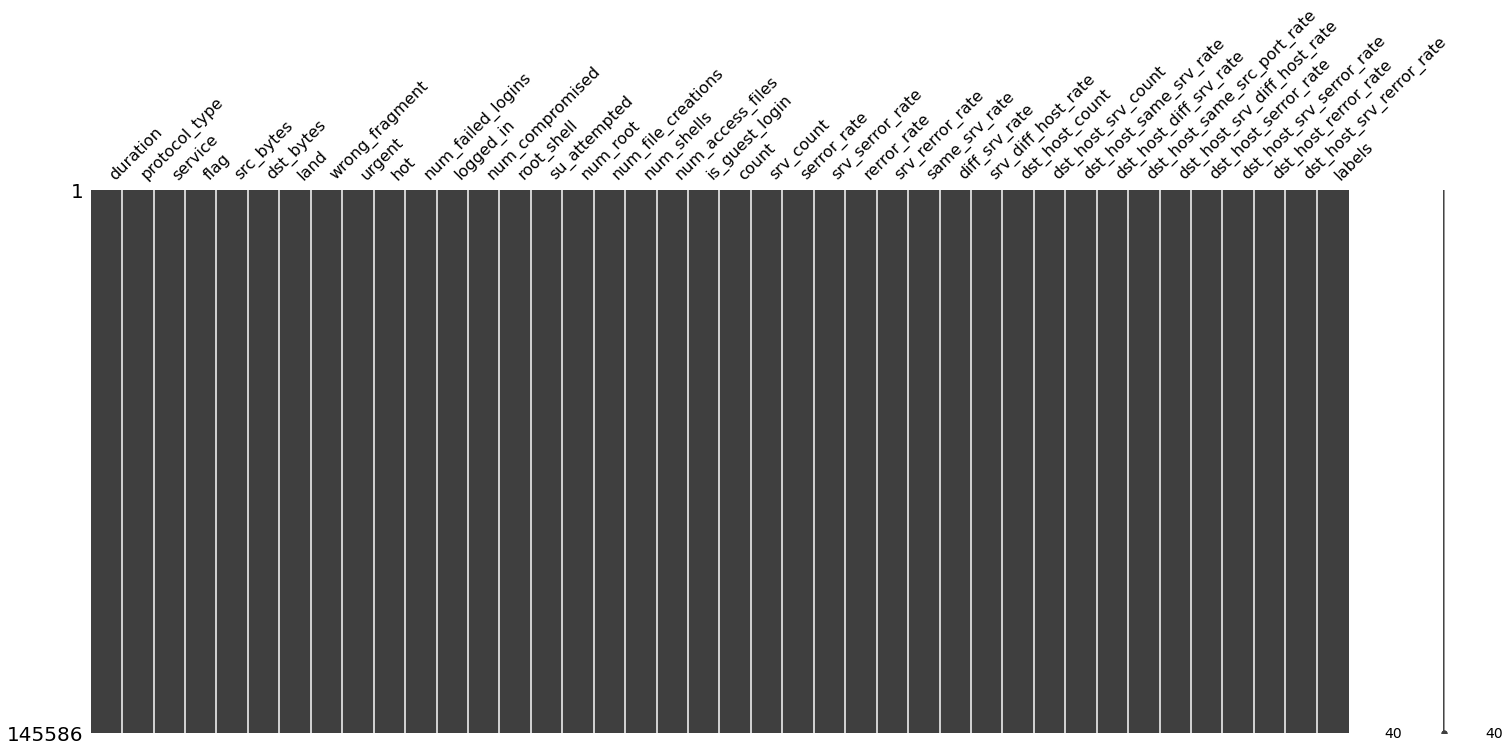

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [20]:
# KNN classifier with default hyperparameters
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999487  1.000000  0.999744     15596
     normal.   0.998332  0.998862  0.998597     26360
      others   0.984099  0.971512  0.977765      1720

    accuracy                       0.998191     43676
   macro avg   0.993973  0.990125  0.992035     43676
weighted avg   0.998184  0.998191  0.998186     43676



In [21]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

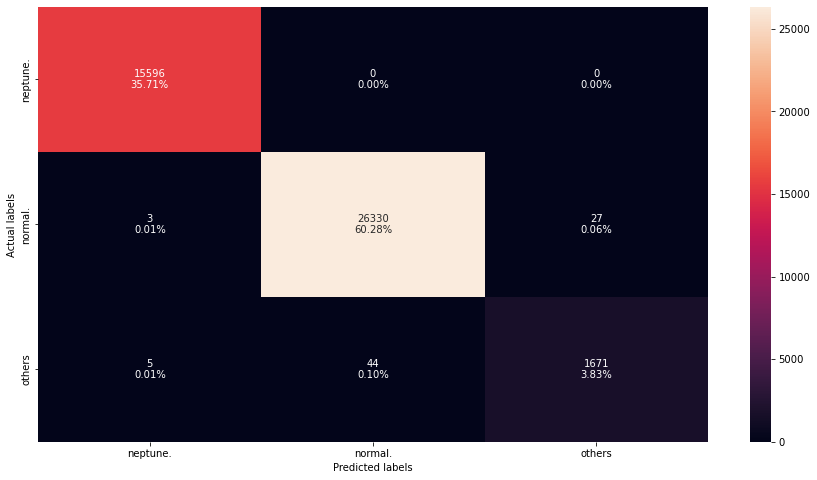

In [22]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_scaled)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

In [23]:
resampler = SMOTETomek(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)

In [24]:
# KNN classifier on resampled data
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

    neptune.   0.999551  0.999744  0.999647     15596
     normal.   0.999315  0.996396  0.997853     26360
      others   0.946488  0.987209  0.966420      1720

    accuracy                       0.997230     43676
   macro avg   0.981785  0.994450  0.987974     43676
weighted avg   0.997319  0.997230  0.997256     43676

ROC AUC Score: 0.9979602224715443


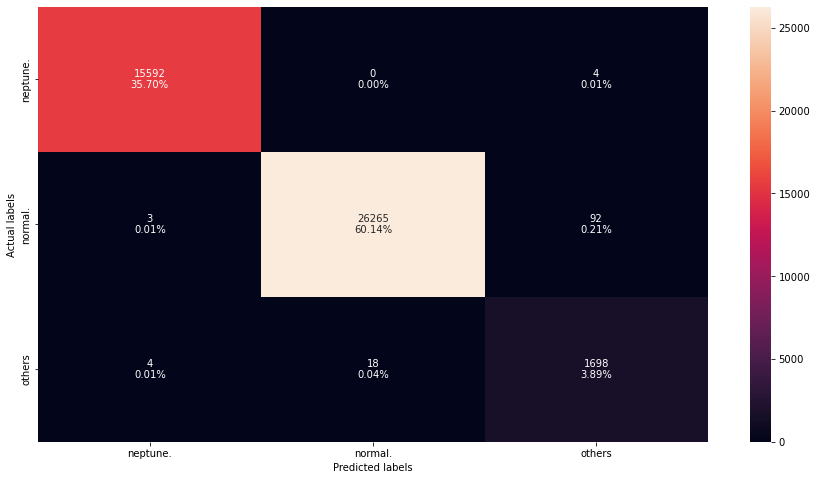

In [25]:
# Confusion matrix heatmap for KNN classifier on resampled data
y_pred = clf.predict(X_test_scaled)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
params = {'n_neighbors':Categorical([1,3,5,7,9]),
          'weights':Categorical(['uniform','distance']), 
          'algorithm':Categorical(['ball_tree', 'kd_tree', 'brute']), 
          'leaf_size':Integer(10,40), 
          'p':Integer(1,3)}

clf_cv = BayesSearchCV(KNeighborsClassifier(),params,verbose=1,n_jobs=-1,scoring='accuracy',n_iter=20)
clf_cv.fit(X_train_scaled, y_train)
clf_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('algorithm', 'kd_tree'),
             ('leaf_size', 40),
             ('n_neighbors', 1),
             ('p', 1),
             ('weights', 'distance')])

In [27]:
# KNN classifier with best hyperparameters
clf = KNeighborsClassifier(n_neighbors=clf_cv.best_params_['n_neighbors'],
                          weights=clf_cv.best_params_['weights'],
                          algorithm=clf_cv.best_params_['algorithm'],
                          leaf_size=clf_cv.best_params_['leaf_size'],
                          p=clf_cv.best_params_['p'])
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

    neptune.   0.999679  0.999744  0.999711     15596
     normal.   0.998976  0.998862  0.998919     26360
      others   0.981417  0.982558  0.981987      1720

    accuracy                       0.998535     43676
   macro avg   0.993357  0.993721  0.993539     43676
weighted avg   0.998535  0.998535  0.998535     43676

ROC AUC Score: 0.9964439262468368


## KNN Example (Regression)

Refer to the following documentation for more details about the use of KNN Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

The following example below illustrates the process of creating a KNN regression model using sklearn library.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor

In [29]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# KNN regressor on default hyperparameters
reg = KNeighborsRegressor()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f"R-squared value: {reg.score(X_test_scaled,y_test)}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_pred,y_test))}")

R-squared value: 0.6771674385381518
Test RMSE:0.656058114840221


Minimum error: 0.6392675626328742 at K = 11


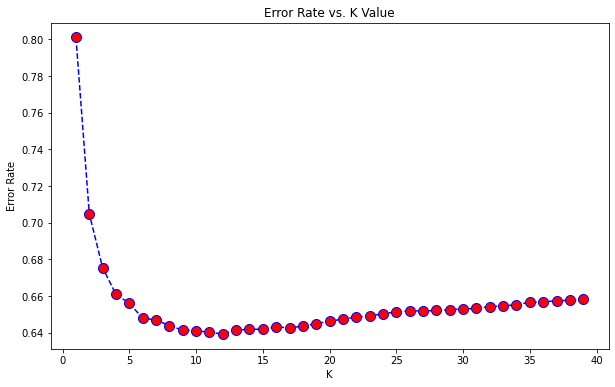

In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.sqrt(mean_squared_error(pred_i,y_test)))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [34]:
# KNN regressor with 11 n_neighbors
reg = KNeighborsRegressor(n_neighbors=11)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f"R-squared value: {reg.score(X_test_scaled,y_test)}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_pred,y_test))}")

R-squared value: 0.6926236787994408
Test RMSE:0.6401604656614505


In [35]:
params = {'n_neighbors':Categorical([1,3,5,7,9]),
          'weights':Categorical(['uniform','distance']), 
          'algorithm':Categorical(['ball_tree', 'kd_tree', 'brute']), 
          'leaf_size':Integer(10,40), 
          'p':Integer(1,3)}

reg_cv = BayesSearchCV(KNeighborsRegressor(),params,verbose=1,n_jobs=-1,n_iter=20)
reg_cv.fit(X_train_scaled, y_train)
reg_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('algorithm', 'brute'),
             ('leaf_size', 10),
             ('n_neighbors', 9),
             ('p', 1),
             ('weights', 'distance')])

In [36]:
# KNN regressor with best hyperparameters
reg = KNeighborsRegressor(n_neighbors=clf_cv.best_params_['n_neighbors'],
                          weights=clf_cv.best_params_['weights'],
                          algorithm=clf_cv.best_params_['algorithm'],
                          leaf_size=clf_cv.best_params_['leaf_size'],
                          p=clf_cv.best_params_['p'])
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f"R-squared value: {reg.score(X_test_scaled,y_test)}")
print(f"Test RMSE:{np.sqrt(mean_squared_error(y_pred,y_test))}")

R-squared value: 0.5576354436652633
Test RMSE:0.767969207696965
